In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [5]:
fashion = keras.datasets.fashion_mnist
type(fashion)


module

In [4]:
fashion

<module 'tensorflow_core.python.keras.api._v2.keras.datasets.fashion_mnist' from '/tensorflow-2.1.0/python3.6/tensorflow_core/python/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [7]:
(X_train, y_train), (X_test, y_test) = fashion.load_data()
X_train.shape, y_train.shape,X_test.shape,y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

9


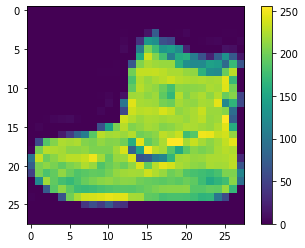

In [16]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()


In [17]:
print(y_train[0])

9


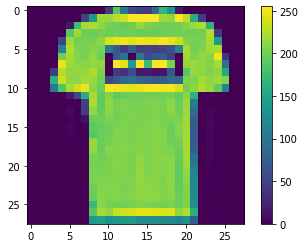

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [19]:
print(y_train[1])

0


In [0]:
X_train_scale=X_train/255.0
X_test_scale=X_test/255.0


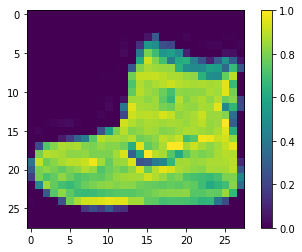

In [25]:
plt.figure()
plt.imshow(X_train_scale[0])
plt.colorbar()

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
model.fit(X_train_scale, y_train, epochs = 300)

Train on 60000 samples
Epoch 1/300
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4871 - accuracy: 0.8249
Epoch 2/300
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3624 - accuracy: 0.8675
Epoch 3/300
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3318 - accuracy: 0.8779
Epoch 4/300
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3073 - accuracy: 0.8851
Epoch 5/300
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2908 - accuracy: 0.8907
Epoch 6/300
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2780 - accuracy: 0.8962
Epoch 7/300
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2650 - accuracy: 0.9005
Epoch 8/300
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2549 - accuracy: 0.9042
Epoch 9/300
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2471 - accuracy: 0.9064
Epoch

In [64]:
test_loss, test_accuracy = model.evaluate(X_test_scale, y_test)
print(test_loss , test_accuracy)

10000/10000 [==============================] - 1s 51us/sample - loss: 2.3628 - accuracy: 0.8826
2.362811868125944 0.8826


In [0]:
pred_classes = model.predict_classes(X_test_scale)

In [66]:
pred_classes

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
pred_val = model.predict(X_test_scale)

In [68]:
pred_val[0],pred_classes[0]

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.90659e-26, 0.00000e+00, 6.61404e-11, 0.00000e+00, 1.00000e+00],
       dtype=float32), 9)

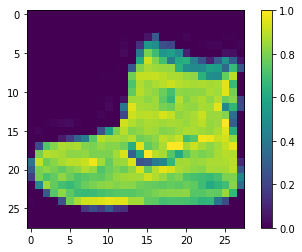

In [69]:
plt.figure()
plt.imshow(X_train_scale[0])
plt.colorbar()

In [70]:
pred_val[1],pred_classes[1]

(array([3.6278568e-32, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        9.8651165e-12, 0.0000000e+00, 2.6828928e-17, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32), 2)

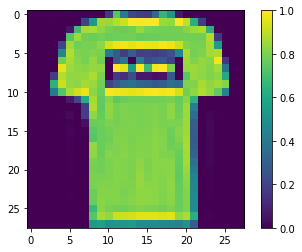

In [71]:
plt.figure()
plt.imshow(X_train_scale[1])
plt.colorbar()

In [72]:
pred_val[1],pred_classes[1]

(array([3.6278568e-32, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        9.8651165e-12, 0.0000000e+00, 2.6828928e-17, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32), 2)

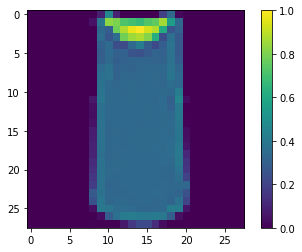

In [73]:
plt.figure()
plt.imshow(X_train_scale[2])
plt.colorbar()

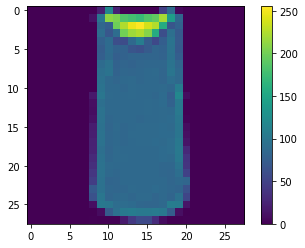

In [74]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()